In [1]:
import pandas as pd
import numpy as np

In [2]:
# IMPORTING DATA FROM URL LINK

data = pd.read_csv("Advertising.csv")

In [3]:
# CHECKING IMPORTED DATA
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# DROP UNRELATED VARIABLE
data = data.drop(["Unnamed: 0"], axis=1)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# CHECKING IS THERE ANY MISSING VALUE. "FALSE" RESPONSE MEANS THAT THERE IS NO MISSING VALUE
data.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [7]:
# EXTRACTING DATA TO X INPUT VARIABLES AND Y OUTPUT VARIABLE

drop = ["Sales"]    # LIST OF VARIABLE(S) WE WANT TO DROP

def extractData(data):      # PYTHON FUNCTION TO EXTRACT THE DATA IN TO X AND Y
    x = data.drop(drop, axis=1)
    y = data["Sales"]
    
    return x, y

x, y = extractData(data)    # DEFINE X AND Y AS THE OUTPUT OF EXTRACTION FUNCTION. 
                            #THE ORDER OF X AND Y MUST BE THE SAME AS THE RETURN OF EXTRACTION FUNCTION

In [8]:
x.head() # CHECKING OUR NEW X INPUT VARIABLES

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [10]:
from sklearn.cross_validation import train_test_split    #IMPORTING TRAIN_TEST_SPLIT PACKAGE

C:\Users\quantum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# SPLITTING THE X AND Y IN TO TRAIN AND TEST SET. KEEP THIS ORDER OF THE LEFT-SIDE TO AVOID COLUMN MISMATCH IN FITTING PROCESS 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 123)

In [12]:
x_train.head()

,TV,Radio,Newspaper
61,261.3,42.7,54.7
195,38.2,3.7,13.8
38,43.1,26.7,35.1
27,240.1,16.7,22.9
54,262.7,28.8,15.9


In [13]:
# FITTING LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# LOOKING FOR R-SQUARED OF THE MODEL
linReg.score(x_train, y_train)

0.90990930065824505

In [15]:
linReg.score(x_test, y_test)

0.8810705224495945

In [16]:
# PREDICT THE Y OF TESTING SET GIVEN X_TEST
y_predicted = linReg.predict(x_test)

In [17]:
y_predicted

array([ 12.41394308,   6.30069821,  15.65198051,   9.68783312,
        14.14024728,  20.53758335,  12.25443466,  20.02681422,
        14.89196606,  10.21807935,   9.97977116,  21.04815394,
         6.20395547,   5.7392927 ,   3.14839636,  11.14327755,
        12.93253414,  15.92132269,   7.51650139,  18.07047191,
         7.3965548 ,  11.42544621,  10.76067004,   7.13502473,
        22.61781187,  10.27883767,  10.41025741,  15.03397826,
         9.84210909,  20.81508197,   9.44177911,  21.25047902,
        24.26488891,   6.54984805,  14.98564271,  19.32457597,
        18.57814102,  19.95131155,  16.25591223,   9.33041178,
         7.91157953,  18.34327591,  15.35495066,  19.0168902 ,
        16.52648994,  14.21936314,  17.32397027,  13.64115111,
        16.40857849,  10.41654713,   9.42033079,  14.54137727,
        21.8505778 ,  14.30335301,   8.23408062,  13.45819847,
         6.71523875,  25.07370047,  13.81524099,  16.76089752,
        14.48077544,   6.77265955,  13.87108145,   9.50

In [18]:
error = y_predicted - y_test

In [19]:
error.head()

50     1.013943
127   -2.499302
37     0.951981
149   -0.412167
19    -0.459753
Name: Sales, dtype: float64

In [20]:
rss = sum(error**2)

In [21]:
rss

322.97700814964367

## Increase Complexity
#### Assume that our model is underfitting and need a more complex model
#### So that, we add some polynomial version of each X input variables

In [22]:
# CREATE A NEW POLYNOMIAL VERSION OF X

x_poly = x**2

In [23]:
x_poly.head(2)

,TV,Radio,Newspaper
0,52946.01,1428.84,4788.64
1,1980.25,1544.49,2034.01


In [24]:
x.head(2)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [25]:
# CONCATENATE THE OLD X AND THE POLYNOMIAL VERSION, SO THAT WE HAVE 6 INPUT VARIABLES
x_all = pd.concat([x, x_poly], axis=1)

In [26]:
x_all.head(2)

,TV,Radio,Newspaper,TV,Radio,Newspaper
0,230.1,37.8,69.2,52946.01,1428.84,4788.64
1,44.5,39.3,45.1,1980.25,1544.49,2034.01


In [27]:
# DONT FORGET TO RE-SPLITTING YOUR DATASET AFTER DOING SOME FEATURE ENGINEERING OR INPUT MODIFICATION

x_trainPoly, x_testPoly, y_train, y_test = train_test_split(x_all, y, test_size = 0.5, random_state = 123)

In [28]:
x_trainPoly.head(2)

,TV,Radio,Newspaper,TV,Radio,Newspaper
61,261.3,42.7,54.7,68277.69,1823.29,2992.09
195,38.2,3.7,13.8,1459.24,13.69,190.44


In [29]:
# RE-FITTING THE LINEAR REGRESSION USING 6 VARIABLE, INCREASING THE COMPLEXITY OF THE MODEL

linRegPoly = LinearRegression()
linRegPoly.fit(x_trainPoly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# COMPARE THESE TWO RESULTS TO OUR FIRST LINEAR REGRESSION, SEE THE DIFFERENCE AND THINK ABOUT UNDER- AND OVER-FITTING
linRegPoly.score(x_trainPoly, y_train)

0.92507764087169131

In [31]:
linRegPoly.score(x_testPoly, y_test)

0.90745025636252741

In [32]:
# INCREASE THE COMPLEXITY AGAIN!!

x_poly_2 = x**5

In [33]:
x_poly_2.head(2)

,TV,Radio,Newspaper
0,6.450347e+11,7.717187e+07,1.586830e+09
1,1.745019e+08,9.374816e+07,1.865876e+08


In [34]:
# CONCATENATE THE NEW POLYNOMIAL OF X
x_complex = pd.concat([x_all, x_poly_2], axis = 1)

In [35]:
x_complex.head(2)

,TV,Radio,Newspaper,TV,Radio,Newspaper,TV,Radio,Newspaper
0,230.1,37.8,69.2,52946.01,1428.84,4788.64,6.450347e+11,7.717187e+07,1.586830e+09
1,44.5,39.3,45.1,1980.25,1544.49,2034.01,1.745019e+08,9.374816e+07,1.865876e+08


In [36]:

x_complex.columns = ['tv', 'radio', 'newsppr', '4', '5', '6', '7', '8', '9']

In [37]:
x_complex.head(1)

,tv,radio,newsppr,4,5,6,7,8,9
0,230.1,37.8,69.2,52946.01,1428.84,4788.64,6.450347e+11,7.717187e+07,1.586830e+09


In [38]:
x_train_com, x_test_com, y_train, y_test = train_test_split(
    x_complex, y, test_size = 0.5, random_state = 123)

In [39]:
x_train_com.head(1)

,tv,radio,newsppr,4,5,6,7,8,9
61,261.3,42.7,54.7,68277.69,1823.29,2992.09,1.218140e+12,1.419513e+08,4.897074e+08


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [46]:
#  linreg POLYNOMIAL 6 variables
linRegPoly.fit(x_trainPoly, y_train)
print ("train score poly: ", linRegPoly.score(x_trainPoly, y_train))
print ("test score poly: ", linRegPoly.score(x_testPoly, y_test))

train score poly:  0.925077640872
test score poly:  0.907450256363


In [49]:
# FITTING BASIC LINREG ON 9 VARIABLES

linRegres = LinearRegression()
linRegres.fit(x_train_com, y_train)
print ("train score: ", linRegres.score(x_train_com, y_train))
print ("test score: ", linRegres.score(x_test_com, y_test))

train score:  0.938692956967
test score:  0.90699573809


# BEST SUBSET SELECTION

In [59]:
from sklearn.feature_selection import f_regression,SelectKBest


x_best = SelectKBest(f_regression, k=4).fit_transform(x_train_com, y_train)
x_best = pd.DataFrame(x_best)
x_best.head()

,0,1,2,3
0,261.3,42.7,68277.69,1.218140e+12
1,38.2,3.7,1459.24,8.134237e+07
2,43.1,26.7,1857.61,1.487258e+08
3,240.1,16.7,57648.01,7.979227e+11
4,262.7,28.8,69011.29,1.251124e+12


In [60]:
# Editing x_best for testing
x_test_best = x_test_com[['tv', 'radio','4', '7']]

In [61]:
linRegBest = LinearRegression()
linRegBest.fit(x_best, y_train)
print ("training score best subset fitted: ", linRegBest.score(x_best, y_train))
print ("testing score best subset fitted: ", linRegBest.score(x_test_best, y_test))

training score best subset fitted:  0.936778989977
testing score best subset fitted:  0.908388741781


In [62]:
#  IMPORT PLOTTING PACKAGE, PREPARING TO DO RIDGE AND LASSO
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

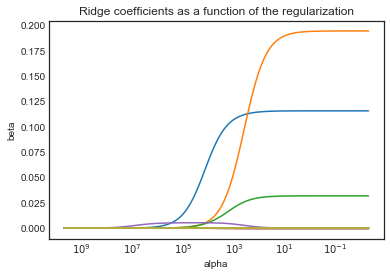

In [63]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train_com, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Ridge coefficients as a function of the regularization');

In [66]:
ridgeCV = RidgeCV(alphas=(0.2, 0.3, 1.2, 4, 8, 20, 30, 32), cv= 4, normalize=True)
ridgeCV.fit(x_train_com, y_train)
print ("Ridge CV training score (9variables): ", ridgeCV.score(x_train_com, y_train))
print ("Ridge CV testing score (9variables): ", ridgeCV.score(x_test_com, y_test))

Ridge CV training score (9variables):  0.938692905607
Ridge CV testing score (9variables):  0.90701393671


In [68]:
print ("choosen alpha: ", ridgeCV.alpha_)

choosen alpha:  1.2


### lets do a Lasso

In [70]:
lasso = LassoCV(n_alphas=1000, alphas=(0.1, 0.2, 0.3, 0.5, 1,2,13), max_iter=1000000, cv = 3, random_state=123)
lasso.fit(x_train_com, y_train)
print ("LASSO CV training score (9variables): ", lasso.score(x_train_com, y_train))
print ("LASSO CV testing score (9variables): ", lasso.score(x_test_com, y_test))

LASSO CV training score (9variables):  0.93857882649
LASSO CV testing score (9variables):  0.907487029478


In [71]:
lasso.mse_path_

array([[ 3.26982639,  7.53224194,  5.68150221],
       [ 2.0154071 ,  3.65791537,  2.79497185],
       [ 1.96465718,  3.53009415,  2.65970381],
       [ 1.8848623 ,  3.29168062,  2.53575853],
       [ 1.91598919,  3.14108163,  2.4872301 ],
       [ 1.94467243,  3.07550879,  2.46916687],
       [ 1.98981263,  3.01642041,  2.45523762]])

In [72]:
lasso.coef_

array([  1.15136588e-01,   1.70639096e-01,   2.57424528e-02,
        -3.24499562e-04,   6.60878664e-04,  -3.41392907e-04,
         5.01729226e-12,  -1.46714547e-09,  -1.35037082e-11])

In [73]:
lasso.alpha_

0.10000000000000001

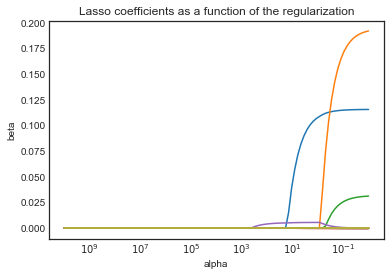

In [74]:
#  This code below just wants to show you the plot of the coefficients

alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter=1000000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(x_train_com, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Lasso coefficients as a function of the regularization');